In [22]:
import GERDA_light as gl 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging as log
logger = log.getLogger()
logger.setLevel(log.INFO)

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
#plt.style.use('seaborn-v0_8-colorblind')


In [23]:
def approximate_PI(p_I:float, p_c: tuple): ## might be redone for different tuple sizes
    if len(p_c)==3:
        P1 = p_c[0]
        P2 = p_c[1]
        P3 = p_c[2]
        return p_I * P1 - (p_I ** 2) * P2 + (p_I ** 3) * P3
    else:
        raise TypeError('need 3 probabilites')
    
def approximate_PI_n(p_I:float, p_c: tuple): 
    PI = 0
    for k,P in enumerate(p_c):
        PI += (-P)*(-p_I)**(k+1)   





import time 
l_T1, l_T2 = [],[] 
for _ in range(1000000):
    t1 = time.time()    
    approximate_PI(0.2,(0.1,0.2,0.3))
    t2 = time.time() 
    approximate_PI_n(0.2,(0.1,0.2,0.3))
    t3 = time.time()

    deltaT1 = t2-t1
    deltaT2 = t3-t2

    l_T1.append(deltaT1)
    l_T2.append(deltaT2)

print(f't1: {np.sum(l_T1):.2f}, t2:{np.sum(l_T2):.2f}')


t1: 0.47, t2:1.16


In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

The probability for an infection event during $\Delta T$
$$P^I_{i,j,\Delta T} = \sum^{T_2}_{l=T_1}k_I \cdot p_{i,j,l}\prod^{l-1}_{m=0}\left(1-k_I \cdot p_{i,j,m}\right)$$

$$P^I_{i,j,\Delta T} = \sum^{\Delta T}_{l=1}{k_I}^{l+1} \cdot p_{i,j,l}\prod^{l-1}_{m=0}\left(\frac{1}{k_I} -p_{i,j,m}\right)$$


In [25]:
## contact probabilities
p = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0,0])#,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
## conditional infection probability
k_I = 0.3
### probabability for an infection in time span T = {t: t>Tmin,t<T_max} - (T_min,T_max)
T_min,T_max = 0,2
T = np.arange(T_min,T_max)

In [26]:
P_I = 0 
for l,t in enumerate(T):
    cp =  1-k_I*p[0:l]## counter probability
    log.debug(f'cp: {cp}')
    P_I += k_I**(t+1)*p[t]*cp.prod()
P_I    

0.03873

$$P^I_{i,j,\Delta T} = p^I_{i,j,1}(1-p^I_{i,j,0}) + p^I_{i,j,2} (1-p^I_{i,j,1})(1-p^I_{i,j,0})+ p^I_{i,j,3} (1-p^I_{i,j,2})(1-p^I_{i,j,1})(1-p^I_{i,j,0}) \quad + \quad ...\\
p^I_{i,j,t} =  k_I \cdot p^C_{i,j,t}
$$

$$P^I_{i,j,\Delta T} = 1 - \prod_{t=1}^T(1-p^I_{i,j,t})$$

##### Test wether both are equivalent 

N = 4

In [14]:
p_s = np.array([0.1,0.9,0.9,0.1])
P_I = p_s[0]*k_I+ p_s[1]*k_I*(1-p_s[0]*k_I)+p_s[2]*k_I*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)+p_s[3]*k_I*(1-p_s[2]*k_I)*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)
log.debug(f'P^I test for n=4 :{P_I}')

P_I = 1-(1-p_s[3]*k_I)*(1-p_s[2]*k_I)*(1-p_s[1]*k_I)*(1-p_s[0]*k_I)
log.debug(f'P^I using the counter prob. test for n=4 :{P_I}')

N=31

In [27]:
p_b = np.array([0.1,0.9,0.9,0.1,0.1,0.1,0.1,0.1,0.0,0,0,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
P_I = 1-(1-k_I*p_b).prod()
log.debug(f'P^I using the counter prob. test for n=4 :{P_I}')

P_1=0
for l,p1 in enumerate(p):
    if l>-1:
        P_1+=p1*k_I * (1-k_I*p_b[:l]).prod() ### array[min:max] max not inluded
    else:
        P_1+=p1*k_I
    #log.debug(f'cp: {P1} , l:{l}')    

log.debug(f'P^I test for n=4 :{P_I}')

What is error using only the linear and the quadratic terms as approximation

$$
\begin{align}
	P^I_{\Delta T} &\approx p_I \underbrace{\sum_{t=T_1}^{T_2}p_t}_{\mathbb{P}_1} - p_I^2\underbrace{\sum_{t=T_1}^{T_2}p_t\sum_{k=0}^{t-1}p_k}_{\mathbb{P}_2}\\
	&\approx p_I \cdot \mathbb{P}_1 - p_I^2 \cdot \mathbb{P}_2
\end{align}
$$

In [28]:
P2 = 0
p0 = np.array([0] + list(p))
for l,pt in enumerate(p):
    P2 += pt*p0[:l].sum()
P1 = p.sum()

log.info(f'k_I*P_1: {k_I*P1}')
log.info(f'k_I**2*P2: {k_I**2*P2}')
log.info(f'k_I*P1-(k_I**2)*P2: {k_I*P1-(k_I**2)*P2}')
log.info(f'1-(1-k_I*p_b).prod(): {1-(1-k_I*p).prod()}')


INFO:root:k_I*P_1: 0.27
INFO:root:k_I**2*P2: 0.0234
INFO:root:k_I*P1-(k_I**2)*P2: 0.2466
INFO:root:1-(1-k_I*p_b).prod(): 0.240496125905738


Collecting additional the terms of  order n=3 provides the following approximation:




$$
\begin{align}
	P^I_{\Delta T} &\approx p_I \underbrace{\sum_{t=T_1}^{T_2}p_t}_{\mathbb{P}_1} - p_I^2\underbrace{\sum_{t=T_1}^{T_2}p_t\sum_{k=0}^{t-1}p_k}_{\mathbb{P}_2}  + p_I^3 \underbrace{\sum^{T=2}_{t=2} p_t \sum^{t-1}_{k=1} p_k \sum^{k-1}_{l=0} p_l}_{\mathbb{P}_3}\\
	&\approx p_I \cdot \mathbb{P}_1 - p_I^2 \cdot \mathbb{P}_2+ p_I^3 \cdot \mathbb{P}_3
\end{align}
$$

In [29]:
def get_P1(p:list)-> float:
    return sum(p)

def get_P2(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p) -> float:
    P3 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
                P3 += pt * pl * sum(p[:l])  
    return P3        

def get_P4(p) -> float:
    P4 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
            for k, pk in enumerate(p[:l]):
                P4 += pt * pl * pk * sum(p[:k])  
    return P4                

p_list = [0.3,0.4,0.5]
log.debug(f'P1 : {get_P1(p_list)}')
log.debug(f'P2 : {get_P2(p_list)}')
log.debug(f'P3 : {get_P3(p_list)}')

In [30]:

def approx_4_PI(p,k_I):
    P1 = get_P1(p)
    P2 = get_P2(p)
    P3 = get_P3(p)
    P4 = get_P4(p)
    return k_I * P1 - (k_I ** 2) * P2 + (k_I ** 3) * P3  - (k_I ** 4) * P4



def approx_3_PI(p,p0,k_I):
    #P1 = p.sum()
    P1 = get_P1(p)
    #P2=0
    P2 =get_P2(p)
    #for l,pt in enumerate(p):
    #    P2 += pt*p0[:l].sum()
    #P3 = 0
    #for t, pt in enumerate(p):
    #    for l,pl in enumerate(p[:t]):
    #            P3 += pt*pl*p0[:l].sum()    
    P3 = get_P3(p)
    return k_I * P1 - (k_I ** 2) * P2 + (k_I ** 3) * P3  

def approx_2_PI(p,p0,k_I):
    #P2=0
    #for l,pt in enumerate(p):
    #    P2 += pt*p0[:l].sum()
    #    #print(l,pt,p0[:l])
    #    #print(pt,l,P2)
    #P1 = p.sum()
    P1 = get_P1(p)
    P2 = get_P2(p)
    return k_I*P1-(k_I**2)*P2

def approx_1_PI(p,p0,k_I):
    P1 = get_P1(p)
    return k_I * P1


def true_PI(p,p0,K_I):    
    return 1-(1-k_I*p).prod()

def contact_P(p):    
    return 1-(1-p).prod()

In [31]:
p = np.array([0.1,0.1,0.2,0.1,0.2,0.1,0.1,0.1,0.0,0,0,0.0,0.3,0.2,0.4,0.5,0.3,0.2,0.2,0.4,0.0,0.1,0.1,0.1])
len(p)

24

In [32]:
p_strong = [0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9]
get_P1(p_strong)

8.100000000000001

In [20]:

p0 = np.array([0] + list(p))
k_Is = np.linspace(0,0.6,20)

results=[]
for k_I in k_Is:
    results.append((
        true_PI(p,p0,k_I),
        approx_1_PI(p,p0,k_I),
        approx_2_PI(p,p0,k_I),
        approx_3_PI(p,p0,k_I),
        approx_4_PI(p,k_I),
        k_I * contact_P(p)))

#list(zip(results))    

INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral


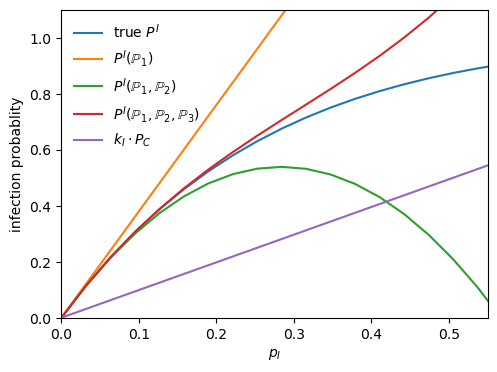

In [14]:
#plt.style.use('seaborn-v0_8')
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('ggplot')
fig, ax =plt.subplots(1,1, figsize=(5.5,4))
#plt.plot(list(zip(k_Is,k_Is)),results)
plt.plot(k_Is, [x[0]for x in results], label=r'true $P^{I}$')
plt.plot(k_Is, [x[1]for x in results], label=r'$P^I(\mathbb{P}_1)$')
plt.plot(k_Is, [x[2]for x in results], label=r'$P^I(\mathbb{P}_1,\mathbb{P}_2)$')
plt.plot(k_Is, [x[3]for x in results], label=r'$P^I(\mathbb{P}_1,\mathbb{P}_2,\mathbb{P}_3)$')
#plt.plot(k_Is, [x[4]for x in results], label='approx k_I^4')
plt.plot(k_Is, [x[5]for x in results], label=r'$k_I \cdot P_{C}$')
plt.ylabel('infection probablity')
plt.xlabel(r'$p_I$')
plt.legend(loc='best',frameon=False)
plt.ylim(0,1.1)
plt.xlim(0,0.55)
plt.savefig('plots/approx_3_24.png', dpi=152, bbox_inches='tight')
plt.show()

[0.         0.11354271 0.21502601 0.30564424 0.3864818  0.45852257
 0.5226585  0.57969757 0.63037109 0.67534044 0.71520323 0.75049903
 0.78171453 0.80928833 0.83361535 0.85505086 0.8739141  0.89049169
 0.9050407  0.91779145] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.11331856  0.21327424  0.29986704  0.37309695  0.43296399
  0.47946814  0.51260942  0.53238781  0.53880332  0.53185596  0.51154571
  0.47787258  0.43083657  0.37043767  0.2966759   0.20955125  0.10906371
 -0.0047867  -0.132     ] [ 0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
 -0.0047867 -0.132    ]


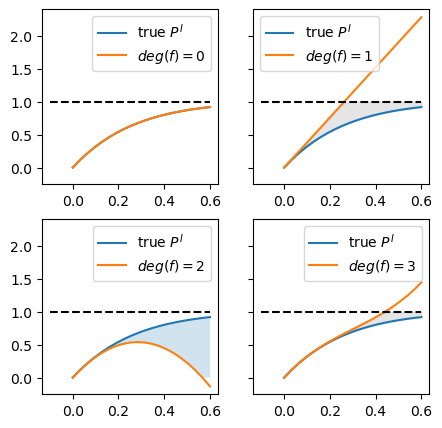

In [25]:
fig, axes = plt.subplots(2,2, figsize=(5,5), sharey=True)

for i in range(4):
    ax = axes.flatten()[i]
    ax.plot(k_Is, [x[0]for x in results], label=r'true $P^{I}$')
    ax.plot(k_Is, [x[i]for x in results], label=f'$deg(f)={{{i}}}$')
    ax.plot([-0.1]+list(k_Is),[1]*(len(k_Is)+1),'--k')
    r =  np.array([x[i]for x in results])
    if i%2==0:
        col = ax.fill_between(k_Is, [x[0]for x in results], np.where(r>0,r,0), alpha=0.2)
        print(r,  np.where(r<0,r,0))
    else:
        col = ax.fill_between(k_Is, np.where(r<1,r,1), [x[0]for x in results], alpha=0.2, color='gray')
    ax.legend()


INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol P from STIXGeneral
INFO:matplotlib.mathtext:Substituting sy

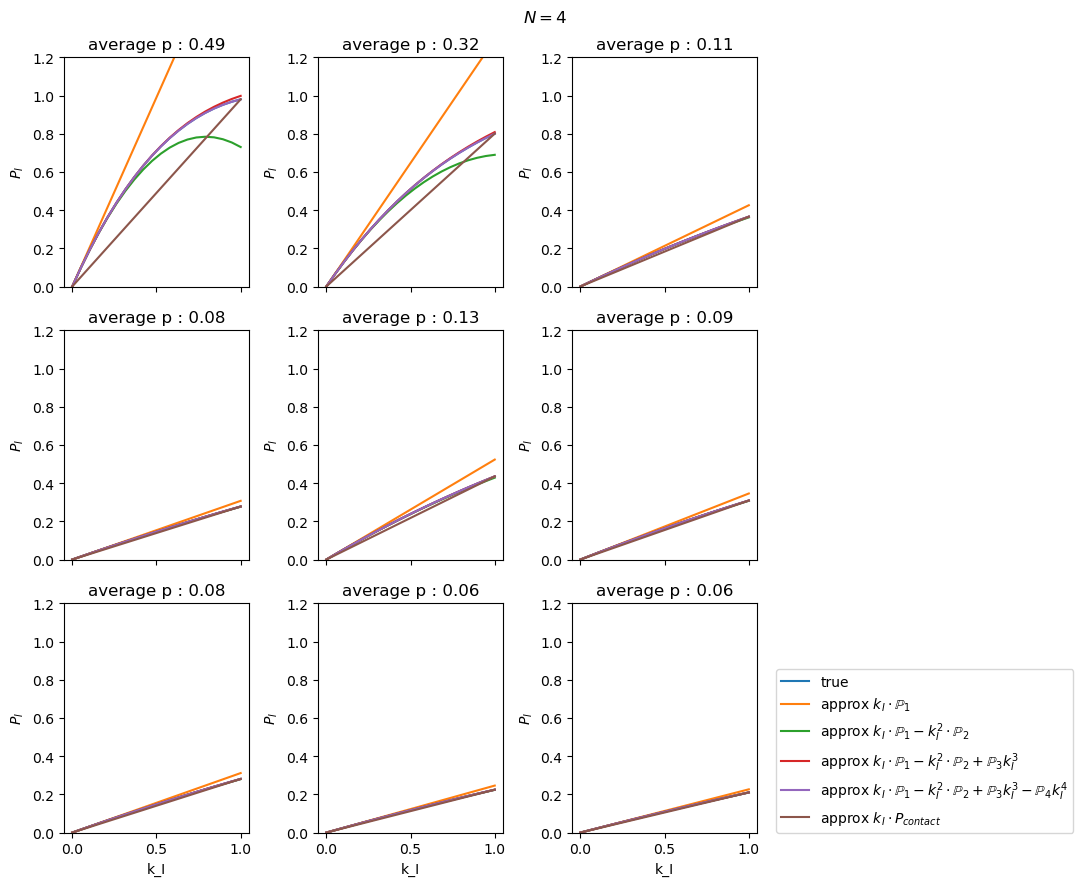

In [16]:
#p = np.array([0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0,0,0.0,0.0,0.0,0.5,0.5,0.1,1,1,1,0.0,0.1,0.1,0.1,0,0,0.1,0.5,0,0.5,0.5])
k_Is = np.linspace(0,1,20)
res_dict = {}
n=4
for i in range(9):
   
    p = np.random.random(n)/(i+1)
    log.debug(p.mean())
    p0 = np.array([0] + list(p))
    results=[]
    
    for k_I in k_Is:
        results.append((
            true_PI(p,p0,k_I),
            approx_1_PI(p,p0,k_I),
            approx_2_PI(p,p0,k_I),
            approx_3_PI(p,p0,k_I),
            approx_4_PI(p,k_I),
            k_I * contact_P(p),
            p.mean()))
    
    res_dict[i] = results   

fig, axes = plt.subplots(3,3, figsize=(11,9), sharex=True)
fig.suptitle(f'$N={n}$')
for i, res in res_dict.items():
    average_p = [x[6] for x in res][0] 
    ax = axes.flatten()[i]
    log.debug(f'{i}')
    ax.plot(k_Is, [x[0] for x in res], label=f'true')
    ax.plot(k_Is, [x[1] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1$')
    ax.plot(k_Is, [x[2] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2$')
    ax.plot(k_Is, [x[3] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2 + \mathbb{{P}}_3 k_I^3$')
    ax.plot(k_Is, [x[4] for x in res], label=f'approx $k_I \cdot \mathbb{{P}}_1 - k_I^2 \cdot \mathbb{{P}}_2 + \mathbb{{P}}_3 k_I^3-\mathbb{{P}}_4 k_I^4$')
    ax.plot(k_Is, [x[5] for x in res], label=f'approx $k_I \cdot P_{{contact}}$')
    ax.set_ylabel(f'$P_I$')
    ax.set_title(f'average p : {average_p :.2f}')
    ax.set_ylim(0,1.2)
    if i > 5:
        ax.set_xlabel('k_I')
ax.legend(loc=(1.1,0))
plt.tight_layout()
fig.savefig(f'plots/approx_4_random_n_{n}_p.png', bbox_inches='tight')

#### Next Implementation into GERDA light

In [21]:
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
w2 = gl.World(
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )

INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1
INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1


In [18]:
cpt = w2.contacts # dict {t:[(i,j,p_i_j_t),]} -> {dT:[(i,j,(P1,P2,P3)]}

def resort_contacts_for_agent_pairs(contacts)->dict:
    '''
    {t:[(i,j,p_i_j_t),]} -> {(i,j) : [(t1,p1),(t2,p2)]}
     resorting {t:[(i,j,p_i_j_t),]} -> {(i,j) : [(t1,p1),(t2,p2)]}
     since its sparse use tuples instead of list [p1,p2,... ]
     p1 contact 
    '''
    pair_dict = {} 
    for t, contact_probs_at_t in contacts.items():    
        for x in contact_probs_at_t:
            if (x[0],x[1]) in pair_dict:
                pair_dict[(x[0],x[1])].append((t,x[2]))
            else:
                pair_dict[(x[0],x[1])] = [(t,x[2])]
    return pair_dict

$$\mathbb{P1}_{i,j,T} = \sum^{t_2}_{t=t_1}p_{i,j,t}$$

In [19]:
def get_P1(p:list)-> float:
    return sum(p)


def get_P2(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p:list)-> float: 
    ## assumed that p is arranged from early to later time points
    P2 = 0.0
    for l,pt in enumerate(p):
        P2 += pt * sum(p[:l]) ## numpy?
        #log.debug((P2,pt,l,p[:l]))
    return P2


def get_P3(p):
    P3 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
                P3 += pt * pl * sum(p[:l])  
    return P3        

def get_P4(p):
    P4 = 0.0
    for t, pt in enumerate(p):
        for l, pl in enumerate(p[:t]):
            for k, pk in enumerate(p[:l]):
                P4 += pt * pl * pk * sum(p[:k])  
    return P4                

p_list = [0.3,0.4,0.5]
log.debug(f'P1 : {get_P1(p_list)}')
log.debug(f'P2 : {get_P2(p_list)}')
log.debug(f'P3 : {get_P3(p_list)}')



In [20]:
schedule_timespan = 168
#i , j = 3 , 4
#pair_dict[(i,j)]
dT = 24 

T_max = int(schedule_timespan/dT)

log.debug(f'T_max: {T_max}')

contacts = w1.contacts # dict {t:[(i,j,p_i_j_t),]} -> {dT:[(i,j,(P1,P2,P3)]}

pair_dict = resort_contacts_for_agent_pairs(contacts)

new_time_dict = {}
for  (i,j), t_p_list in pair_dict.items():
   t_p_T_list = [x+(int(x[0]/dT),) for x in  t_p_list]
   
   if  not t_p_T_list:
      continue
   
   for T in range(1,T_max+1):
      
      p_list = [x[1] for x in t_p_T_list if x[2] == T]
      # T+1 ? 
      if p_list:
         P1 = get_P1(p_list)
         P2 = get_P2(p_list)
         P3 = get_P3(p_list)
         P4 = get_P4(p_list)
         if P1 > 0:
            if T in new_time_dict:
               new_time_dict[T].append((i,j,P1,P2,P3,P4))
            else:
               new_time_dict[T] =[(i,j,P1,P2,P3,P4)]  
      #log.debug((T,i,j,P1,P2,P3))      


TypeError: unsupported operand type(s) for +: 'int' and 'tuple'